In [44]:
def overlap(a, b, min_length=3):
    """ Return length of longest suffix of 'a' matching
        a prefix of 'b' that is at least 'min_length'
        characters long.  If no such overlap exists,
        return 0. """
    start = 0  # start all the way at the left
    while True:
        start = a.find(b[:min_length], start)  # look for b's prefix in a
        if start == -1:  # no more occurrences to right
            return 0
        # found occurrence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1

In [45]:
def de_bruijn_ize(st, k):
    """ Return a list holding, for each k-mer, its left
        k-1-mer and its right k-1-mer in a pair """
    edges = []
    nodes = set()
    for i in range(len(st) - k + 1):
        edges.append((st[i:i+k-1], st[i+1:i+k]))
        nodes.add(st[i:i+k-1])
        nodes.add(st[i+1:i+k])
    return nodes, edges

In [55]:
nodes, edges = de_bruijn_ize("ATGTTTTTAAGAAAACCCATATTAAATACTTCAACAGGCCGATGCGGTGCCATTGGTGTAATAAAAATTTCATTTGGTTATATAAATAAAAAAATATTATATTTTATATTTAAAAAAGTATTTTATAAAAAAATAAAAAATAAATTTAT", 5)

In [56]:
edges

[('ATGT', 'TGTT'),
 ('TGTT', 'GTTT'),
 ('GTTT', 'TTTT'),
 ('TTTT', 'TTTT'),
 ('TTTT', 'TTTA'),
 ('TTTA', 'TTAA'),
 ('TTAA', 'TAAG'),
 ('TAAG', 'AAGA'),
 ('AAGA', 'AGAA'),
 ('AGAA', 'GAAA'),
 ('GAAA', 'AAAA'),
 ('AAAA', 'AAAC'),
 ('AAAC', 'AACC'),
 ('AACC', 'ACCC'),
 ('ACCC', 'CCCA'),
 ('CCCA', 'CCAT'),
 ('CCAT', 'CATA'),
 ('CATA', 'ATAT'),
 ('ATAT', 'TATT'),
 ('TATT', 'ATTA'),
 ('ATTA', 'TTAA'),
 ('TTAA', 'TAAA'),
 ('TAAA', 'AAAT'),
 ('AAAT', 'AATA'),
 ('AATA', 'ATAC'),
 ('ATAC', 'TACT'),
 ('TACT', 'ACTT'),
 ('ACTT', 'CTTC'),
 ('CTTC', 'TTCA'),
 ('TTCA', 'TCAA'),
 ('TCAA', 'CAAC'),
 ('CAAC', 'AACA'),
 ('AACA', 'ACAG'),
 ('ACAG', 'CAGG'),
 ('CAGG', 'AGGC'),
 ('AGGC', 'GGCC'),
 ('GGCC', 'GCCG'),
 ('GCCG', 'CCGA'),
 ('CCGA', 'CGAT'),
 ('CGAT', 'GATG'),
 ('GATG', 'ATGC'),
 ('ATGC', 'TGCG'),
 ('TGCG', 'GCGG'),
 ('GCGG', 'CGGT'),
 ('CGGT', 'GGTG'),
 ('GGTG', 'GTGC'),
 ('GTGC', 'TGCC'),
 ('TGCC', 'GCCA'),
 ('GCCA', 'CCAT'),
 ('CCAT', 'CATT'),
 ('CATT', 'ATTG'),
 ('ATTG', 'TTGG'),
 ('TTGG', 'T

In [57]:
def visualize_de_bruijn(st, k):
    """ Visualize a directed multigraph using graphviz """
    nodes, edges = de_bruijn_ize(st, k)
    dot_str = 'digraph "DeBruijn graph" {\n'
    for node in nodes:
        dot_str += '  %s [label="%s"] ;\n' % (node, node)
    for src, dst in edges:
        dot_str += '  %s -> %s ;\n' % (src, dst)
    return dot_str + '}\n'

  Running setup.py bdist_wheel for gvmagic ... done
  Stored in directory: /home/amit/.cache/pip/wheels/f6/67/1f/64d62350d4cffe0a94e39af37828a6a5bfba1b9b9d6d95dbf8
Successfully built gvmagic
You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [42]:
"""
Graphviz IPython magic extensions

Magic methods:
    %dot <dot graph>
    %%dot <dot ...
    ... graph>
    %dotstr "<dot graph>"
    %dotobj obj.to_dot()
    %dotobjs obj[0].to_dot(), obj[1].to_dot(), ...

    also: %twopi, %neato, %sdp, %fsdp, and %circo magic families.

Usage:
    %load_ext gvmagic
"""


from logging import info, error
from subprocess import Popen, PIPE

from IPython.core.display import display_svg
from IPython.core.magic import Magics
from IPython.core.magic import line_cell_magic
from IPython.core.magic import line_magic
from IPython.core.magic import magics_class


def run_graphviz(s, layout_engine='dot'):
    """Execute dot with a layout and return a raw SVG image, or None."""
    cmd = ['dot', '-Tsvg', '-K', layout_engine]

    dot = Popen(cmd, stdin=PIPE, stdout=PIPE, stderr=PIPE)
    stdoutdata, stderrdata = dot.communicate(s.encode('utf-8'))
    status = dot.wait()
    if status == 0:
        return stdoutdata
    else:
        fstr = "dot returned {}\n[==== stderr ====]\n{}"
        error(fstr.format(status, stderrdata.decode('utf-8')))
        return None


@magics_class
class GraphvizMagics(Magics):

    @line_cell_magic
    def dot(self, line, cell=None):
        self._from_cell(line, cell, 'dot')

    @line_magic
    def dotstr(self, line):
        self._from_str(line, 'dot')

    @line_magic
    def dotobj(self, line):
        self._from_obj(line, 'dot')

    @line_magic
    def dotobjs(self, line):
        self._from_objs(line, 'dot')

    @line_cell_magic
    def neato(self, line, cell=None):
        self._from_cell(line, cell, 'neato')

    @line_magic
    def neatostr(self, line):
        self._from_str(line, 'neato')

    @line_magic
    def neatoobj(self, line):
        self._from_obj(line, 'neato')

    @line_magic
    def neatoobjs(self, line):
        self._from_objs(line, 'neato')

    @line_cell_magic
    def sfdp(self, line, cell=None):
        self._from_cell(line, cell, 'sfdp')

    @line_magic
    def sfdpstr(self, line):
        self._from_str(line, 'sfdp')

    @line_magic
    def sfdpobj(self, line):
        self._from_obj(line, 'sfdp')

    @line_magic
    def sfdpobjs(self, line):
        self._from_objs(line, 'sfdp')

    @line_cell_magic
    def fdp(self, line, cell=None):
        self._from_cell(line, cell, 'fdp')

    @line_magic
    def fdpstr(self, line):
        self._from_str(line, 'fdp')

    @line_magic
    def fdpobj(self, line):
        self._from_obj(line, 'fdp')

    @line_magic
    def fdpobjs(self, line):
        self._from_objs(line, 'fdp')

    @line_cell_magic
    def twopi(self, line, cell=None):
        self._from_cell(line, cell, 'twopi')

    @line_magic
    def twopistr(self, line):
        self._from_str(line, 'twopi')

    @line_magic
    def twopiobj(self, line):
        self._from_obj(line, 'twopi')

    @line_magic
    def twopiobjs(self, line):
        self._from_objs(line, 'twopi')

    @line_cell_magic
    def circo(self, line, cell=None):
        self._from_cell(line, cell, 'circo')

    @line_magic
    def circostr(self, line):
        self._from_str(line, 'circo')

    @line_magic
    def circoobj(self, line):
        self._from_obj(line, 'circo')

    @line_magic
    def circoobjs(self, line):
        self._from_objs(line, 'circo')

    def _from_cell(self, line, cell, layout_engine):
        if cell is None:
            s = line
        else:
            s = line + '\n' + cell
        data = run_graphviz(s, layout_engine)
        if data:
            display_svg(data, raw=True)

    def _from_str(self, line, layout_engine):
        s = self.shell.ev(line)
        data = run_graphviz(s, layout_engine)
        if data:
            display_svg(data, raw=True)

    def _from_obj(self, line, layout_engine):
        obj = self.shell.ev(line)
        try:
            s = obj.to_dot()
        except AttributeError:
            error("expected object to implement 'to_dot()' method")
        except TypeError:
            error("expected to_dot method to be callable w/o args")
        else:
            data = run_graphviz(s, layout_engine)
            if data:
                display_svg(data, raw=True)

    def _from_objs(self, line, layout_engine):
        """dot objects magic"""
        objs = self.shell.ev(line)
        for i, obj in enumerate(objs):
            try:
                s = obj.to_dot()
            except AttributeError:
                error("expected object to implement 'to_dot()' method")
            except TypeError:
                error("expected to_dot method to be callable w/o args")
            else:
                data = run_graphviz(s, layout_engine)
                if data:
                    info("object {}:".format(i))
                    display_svg(data, raw=True)


def load_ipython_extension(ipython):
    """Load the extension in IPython."""
    ipython.register_magics(GraphvizMagics)


def unload_ipython_extension(ipython):
    """Unload the extension in IPython."""
    pass

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


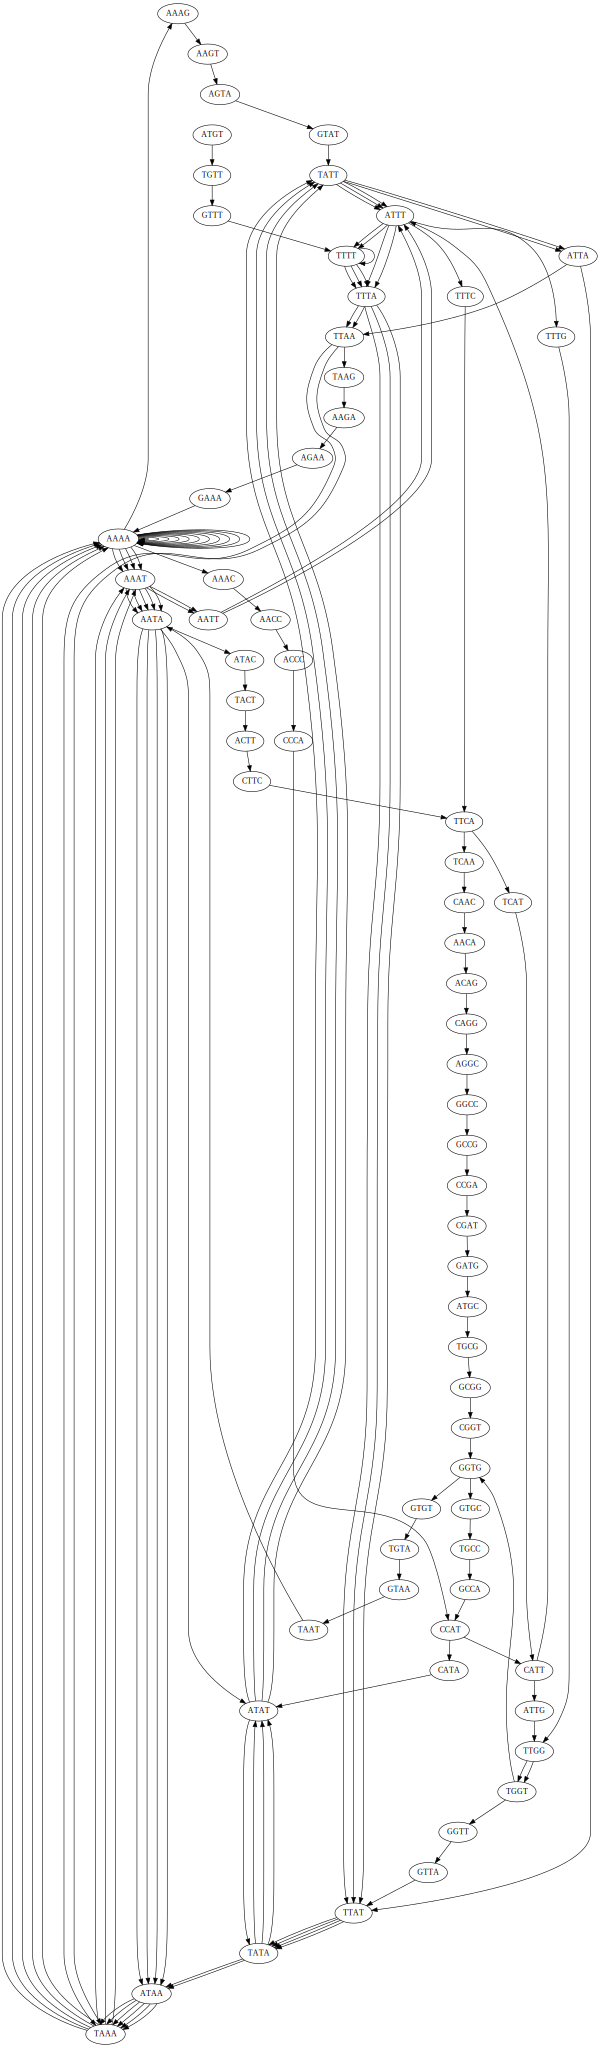

In [58]:
%load_ext gvmagic
%dotstr visualize_de_bruijn("ATGTTTTTAAGAAAACCCATATTAAATACTTCAACAGGCCGATGCGGTGCCATTGGTGTAATAAAAATTTCATTTGGTTATATAAATAAAAAAATATTATATTTTATATTTAAAAAAGTATTTTATAAAAAAATAAAAAATAAATTTAT", 5)


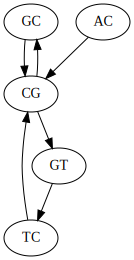

In [59]:
%dotstr visualize_de_bruijn("ACGCGTCG", 3)

In [2]:
import itertools

def scs(ss):
    """ Returns shortest common superstring of given strings,
        assuming no string is a strict substring of another """
    shortest_sup = None
    for ssperm in itertools.permutations(ss):
        sup = ssperm[0]
        for i in range(len(ss)-1):
            olen = overlap(ssperm[i], ssperm[i+1], min_length=1)
            sup += ssperm[i+1][olen:]
        if shortest_sup is None or len(sup) < len(shortest_sup):
            shortest_sup = sup
    return shortest_sup

In [8]:
scs(['AAC',
'ACG',
'GAA',
'GTT',
'TCG'])

'GAACGTTCG'

In [9]:
def pick_maximal_overlap(reads, k):
    """ Return a pair of reads from the list with a
        maximal suffix/prefix overlap >= k.  Returns
        overlap length 0 if there are no such overlaps."""
    reada, readb = None, None
    best_olen = 0
    for a, b in itertools.permutations(reads, 2):
        olen = overlap(a, b, min_length=k)
        if olen > best_olen:
            reada, readb = a, b
            best_olen = olen
    return reada, readb, best_olen

In [51]:
pick_maximal_overlap(['AAC',
'ACG',
'GAA',
'GTT',
'TCG'],2)

('AAC', 'ACG', 2)

In [13]:
def greedy_scs(reads, k):
    """ Greedy shortest-common-superstring merge.
        Repeat until no edges (overlaps of length >= k)
        remain. """
    read_a, read_b, olen = pick_maximal_overlap(reads, k)
    while olen > 0:
        reads.remove(read_a)
        reads.remove(read_b)
        reads.append(read_a + read_b[olen:])
        read_a, read_b, olen = pick_maximal_overlap(reads, k)
    return ''.join(reads)

In [53]:
greedy_scs(['AAC',
'ACG',
'GAA',
'GTT',
'TCG'],2)

'GTTTCGGAACG'